# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 1.预处理

In [3]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [14]:
output_path = r'G:\Desktop\social\BigHomework\result'
file_path = r'G:\Desktop\AI\LDA\weibo_data\weibo_data_preprocessed.csv'
data=pd.read_csv(file_path).astype(str)#content type
stop_file = r"G:\Desktop\AI\LDA\data\stop_words.txt"

In [15]:
# 中文分词，使用jieba分词，只保留名词/动名词
def chinese_word_cut(mytext):
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        # 只保留中文
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

In [17]:
data.head()

,博主昵称,微博认证,content,发布时间,转发,评论,赞
0,辣子鸡谁做的好吃,nan,好像可以在自己幻想的元宇宙里过一辈子好像已经过完了一辈子双鱼座的脑子要不得,01月10日 23:59,0,0,0
1,远古的刀,nan,反正闭关锁宇宙我们将会面临下一次的闭关锁国融入不了全球经济王峻涛6688跟你们讲我相信这个元...,01月10日 23:58,32,3,0
2,暮景烟_深浅,nan,周深先生之夜元宇宙周深拥有了生米就像拥有了梦的翅膀卡布叻_周深放心飞吧生米永相随cp时尚先生...,01月10日 23:58,0,0,0
3,东辉毅恒传媒,nan,王峻涛6688其实吧你有空可以再看看这个视频跟你们讲我相信这个元宇宙真的会来虽然不是一下子就...,01月10日 23:57,0,0,0
4,在寒蝉鸣泣中等待夏日重现,nan,敬元宇宙L让基尔希斯坦的女朋友的微博视频,01月10日 23:57,0,0,5


In [18]:
data["content"] = data.content.apply(chinese_word_cut)
data.to_csv('weibi_data_keywords.csv')

In [4]:
data.head()

NameError: name 'data' is not defined

## 2.LDA分析

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

data = pd.read_csv(r'G:\Desktop\AI\LDA\weibi_data_keywords.csv').astype(str)

In [5]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [14]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content)

In [6]:
n_features = 1000
tf_vectorizer1 = TfidfVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf1 = tf_vectorizer1.fit_transform(data.content)

In [7]:
n_topics = 5
lda1 = LatentDirichletAllocation(n_components=n_topics, max_iter=100,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda1.fit(tf1)

LatentDirichletAllocation(learning_offset=50, max_iter=100, n_components=5,
                          random_state=0)

In [1]:
lda1

NameError: name 'lda1' is not defined

In [23]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=8,
                          random_state=0)

### 2.1输出每个主题对应词语 

In [8]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)


NameError: name 'tf_vectorizer' is not defined

In [9]:
n_top_words = 25
tf_feature_names1 = tf_vectorizer1.get_feature_names()
topic_word = print_top_words(lda1, tf_feature_names1, n_top_words)

Topic #0:
世界 数字 藏品 人类 艺术 回家 视频 现实 生活 星球 时代 虚拟世界 老师 电影 时间 作品 图片 感觉 代言人 空间 科幻 科技 体验 玩家 概念
Topic #1:
区块 游戏 手游 项目 社区 以太 货币 币圈 链元 链接 网页 链游 合约 海盗 财经 狗狗 上线 交易 视频 数字 土地 计划 生态 代币 行情
Topic #2:
板块 股份 市场 个股 资金 概念 指数 股票 龙头 机会 行情 新能源 方向 题材 科技 大盘 调整 文章 趋势 医药 热点 预期 走势 股市 创业板
Topic #3:
链接 网页 时尚 抽奖 话题 平台 粉丝 感觉 概念 官方 新品 评论 舞台 和元 朋友 发布会 体验 玩法 商标 音乐 直播 星辰 小伙伴 女王 口罩
Topic #4:
公司 视频 技术 科技 发展 互联网 游戏 概念 数字 产品 投资 产业 领域 行业 经济 企业 平台 社交 世界 全球 腾讯 新闻 布局 现实 内容


c:\Users\31897\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 2.2输出每篇文章对应主题 

In [10]:
import numpy as np

In [12]:
topics=lda1.transform(tf1)

In [1]:
lda

NameError: name 'lda' is not defined

In [13]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic_tfidf.xlsx",index=False)

### 2.3可视化 

In [14]:
import pyLDAvis
import pyLDAvis.sklearn

In [16]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda1, tf1, tf_vectorizer1)
pyLDAvis.display(pic)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.display(pic)
#去工作路径下找保存好的html文件
#和视频里讲的不一样，目前这个代码不需要手动中断运行，可以快速出结果

c:\Users\31897\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\31897\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### 2.4困惑度 

In [17]:
import matplotlib.pyplot as plt

In [19]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda2 = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda2.fit(tf1)
    plexs.append(lda2.perplexity(tf1))
    scores.append(lda2.score(tf1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


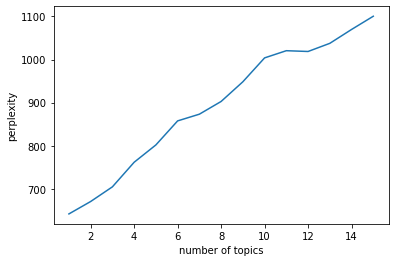

In [20]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()